# Solver Performance Comparision Experiment Evaluation

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from texttable import Texttable
import latextable
from scipy import stats

## Pre-Processing

In [13]:
file = "n1_SolverPerformanceComparisonExperiment_2022-01-10_17-44-34.csv"

df_frame = pd.read_csv(file)
df_frame['makespan_derivation'] = df_frame['makespan'] - df_frame['makespan-optimum']
df_frame.loc[df_frame['makespan_derivation'] != 0, 'robustness'] = -1
list_ordering = {"RandomSolver": 0, "HillClimbing": 1, "TabuSearch": 2, "SimulatedAnnealing": 3, "GeneticAlgorithm": 4}
df_frame["solver"] = pd.Categorical(df_frame["solver"], categories=list_ordering)

df_frame['optimum'] = False
df_frame['feasible'] = True

df_frame.loc[df_frame['makespan_derivation'] == 0, 'optimum'] = True
df_frame.loc[df_frame['makespan'] == -1, 'feasible'] = False

df_frame.head(100)

,benchmark,solver,iterations,makespan-optimum,makespan,robustness,makespan_derivation,optimum,feasible
0,n1.mm/n110_1.mm,TabuSearch,2500,17,17,14,0,True,True
1,n1.mm/n110_1.mm,GeneticAlgorithm,2500,17,17,14,0,True,True
2,n1.mm/n110_1.mm,SimulatedAnnealing,2500,17,18,-1,1,False,True
3,n1.mm/n110_1.mm,HillClimbing,2500,17,18,-1,1,False,True
4,n1.mm/n110_1.mm,RandomSolver,2500,17,20,-1,3,False,True
...,...,...,...,...,...,...,...,...,...
95,n1.mm/n110_1.mm,RandomSolver,1000,17,25,-1,8,False,True
96,n1.mm/n110_1.mm,SimulatedAnnealing,5000,17,17,14,0,True,True
97,n1.mm/n110_1.mm,RandomSolver,2500,17,22,-1,5,False,True
98,n1.mm/n110_1.mm,GeneticAlgorithm,5000,17,17,14,0,True,True


## Feasible and Optimal Rate Calculation

In [14]:
df_groupby_descriptive_feasible = df_frame.groupby(['benchmark', 'solver', 'iterations']).agg({'feasible': 'sum'})
df_groupby_descriptive_feasible.loc[df_groupby_descriptive_feasible['feasible'] != 0, 'feasible'] = 1
df_groupby_descriptive_feasible = df_groupby_descriptive_feasible.groupby(['solver', 'iterations']).describe()['feasible']

df_groupby_descriptive_optimum = df_frame.groupby(['benchmark', 'solver', 'iterations']).agg({'optimum': 'sum'})
df_groupby_descriptive_optimum.loc[df_groupby_descriptive_optimum['optimum'] != 0, 'optimum'] = 1
df_groupby_descriptive_optimum = df_groupby_descriptive_optimum.groupby(['solver', 'iterations']).describe()['optimum']

concated = pd.concat([df_groupby_descriptive_feasible[['mean']], df_groupby_descriptive_optimum[['mean']]], axis=1, keys=['Feasible', 'Optimum'])
concated = concated * 100
concated

Feasible    Optimum
                                  mean       mean
solver             iterations                    
RandomSolver       500           100.0   7.692308
                   1000          100.0  10.518053
                   2500          100.0  14.913658
                   5000          100.0  19.466248
HillClimbing       500           100.0  54.631083
                   1000          100.0  56.671900
                   2500          100.0  55.259027
                   5000          100.0  56.671900
TabuSearch         500           100.0  64.835165
                   1000          100.0  75.353218
                   2500          100.0  83.045526
                   5000          100.0  87.755102
SimulatedAnnealing 500           100.0  50.392465
                   1000          100.0  63.422292
                   2500          100.0  78.963893
                   5000          100.0  87.912088
GeneticAlgorithm   500           100.0  48.037677
                   1000          100.0  73.626374
                   2500          100.0  87.127159
                   5000          100.0  91.208791

## Derivation Makespan and Robustness Calculation

In [15]:
df_groupby_descriptive_makespan = df_frame.groupby(['solver', 'iterations'])['makespan_derivation'].describe()
df_groupby_descriptive_makespan

count      mean       std  min  25%  50%  75%  \
solver             iterations                                                   
RandomSolver       500         3822.0  6.173993  3.465510  0.0  4.0  6.0  8.0   
                   1000        3822.0  5.300366  3.153044  0.0  3.0  5.0  7.0   
                   2500        3822.0  4.403454  2.756443  0.0  2.0  4.0  6.0   
                   5000        3822.0  3.760073  2.570594  0.0  2.0  3.0  5.0   
HillClimbing       500         3822.0  2.612507  2.974687  0.0  0.0  2.0  4.0   
                   1000        3822.0  2.482208  2.879700  0.0  0.0  2.0  4.0   
                   2500        3822.0  2.422554  2.867509  0.0  0.0  1.0  4.0   
                   5000        3822.0  2.413658  2.783518  0.0  0.0  2.0  4.0   
TabuSearch         500         3822.0  1.851910  2.373642  0.0  0.0  1.0  3.0   
                   1000        3822.0  1.365254  2.001969  0.0  0.0  0.0  2.0   
                   2500        3822.0  0.943747  1.655561  0.0  0.0  0.0  1.0   
                   5000        3822.0  0.720304  1.425641  0.0  0.0  0.0  1.0   
SimulatedAnnealing 500         3822.0  2.598116  2.690271  0.0  0.0  2.0  4.0   
                   1000        3822.0  1.653323  2.053438  0.0  0.0  1.0  3.0   
                   2500        3822.0  0.947933  1.456751  0.0  0.0  0.0  1.0   
                   5000        3822.0  0.586081  1.003681  0.0  0.0  0.0  1.0   
GeneticAlgorithm   500         3822.0  2.229723  2.353718  0.0  0.0  2.0  4.0   
                   1000        3822.0  1.034014  1.388024  0.0  0.0  0.0  2.0   
                   2500        3822.0  0.489273  0.878225  0.0  0.0  0.0  1.0   
                   5000        3822.0  0.386970  0.764406  0.0  0.0  0.0  1.0   

                                max  
solver             iterations        
RandomSolver       500         29.0  
                   1000        21.0  
                   2500        16.0  
                   5000        17.0  
HillClimbing       500         23.0  
                   1000        18.0  
                   2500        18.0  
                   5000        19.0  
TabuSearch         500         18.0  
                   1000        13.0  
                   2500        13.0  
                   5000        14.0  
SimulatedAnnealing 500         17.0  
                   1000        14.0  
                   2500        12.0  
                   5000         7.0  
GeneticAlgorithm   500         14.0  
                   1000         9.0  
                   2500         6.0  
                   5000         7.0

In [16]:
df_groupby_descriptive_robustness = df_frame[df_frame.robustness != -1].groupby(['solver', 'iterations'])['robustness'].describe()
df_groupby_descriptive_robustness

count       mean       std  min   25%   50%  \
solver             iterations                                                 
RandomSolver       500           97.0  14.989691  4.111708  4.0  12.0  15.0   
                   1000         149.0  15.208054  5.056806  2.0  12.0  15.0   
                   2500         233.0  15.549356  5.335988  3.0  13.0  15.0   
                   5000         354.0  15.661017  5.139229  2.0  12.0  15.0   
HillClimbing       500         1245.0  17.957430  6.023850  1.0  14.0  18.0   
                   1000        1332.0  17.883634  6.008819  4.0  14.0  18.0   
                   2500        1333.0  17.957239  5.992774  1.0  14.0  18.0   
                   5000        1323.0  17.733182  6.051394  2.0  14.0  18.0   
TabuSearch         500         1595.0  18.003135  6.438055  1.0  14.0  18.0   
                   1000        1937.0  17.746515  6.640742  1.0  13.0  18.0   
                   2500        2348.0  17.543015  6.644758  0.0  13.0  17.0   
                   5000        2594.0  17.475328  6.694793  2.0  13.0  17.0   
SimulatedAnnealing 500         1083.0  17.807941  6.381585  2.0  14.0  17.0   
                   1000        1544.0  17.814119  6.562213  0.0  14.0  17.0   
                   2500        2109.0  17.404457  6.877624  0.0  12.0  17.0   
                   5000        2474.0  17.294665  6.959538  1.0  12.0  17.0   
GeneticAlgorithm   500         1249.0  17.615693  6.472546  2.0  13.0  17.0   
                   1000        1921.0  17.092140  6.692685  0.0  12.0  17.0   
                   2500        2620.0  17.214885  6.720800  0.0  13.0  17.0   
                   5000        2814.0  17.301706  6.624424  0.0  13.0  17.0   

                                75%   max  
solver             iterations              
RandomSolver       500         18.0  25.0  
                   1000        18.0  31.0  
                   2500        19.0  34.0  
                   5000        19.0  34.0  
HillClimbing       500         22.0  40.0  
                   1000        22.0  41.0  
                   2500        22.0  42.0  
                   5000        21.0  41.0  
TabuSearch         500         22.0  42.0  
                   1000        22.0  40.0  
                   2500        22.0  42.0  
                   5000        22.0  42.0  
SimulatedAnnealing 500         22.0  41.0  
                   1000        22.0  42.0  
                   2500        22.0  42.0  
                   5000        22.0  42.0  
GeneticAlgorithm   500         22.0  42.0  
                   1000        21.0  42.0  
                   2500        21.0  42.0  
                   5000        21.0  42.0

In [17]:
concated = pd.concat([df_groupby_descriptive_makespan[['mean', 'std']], df_groupby_descriptive_robustness[['mean', 'std']], df_groupby_descriptive_feasible[['mean']] * 100, df_groupby_descriptive_optimum[['mean']] * 100], axis=1, keys=['Makespan', 'Robustness', 'Feasible', 'Optimum'])
concated

Makespan           Robustness            \
                                   mean       std       mean       std   
solver             iterations                                            
RandomSolver       500         6.173993  3.465510  14.989691  4.111708   
                   1000        5.300366  3.153044  15.208054  5.056806   
                   2500        4.403454  2.756443  15.549356  5.335988   
                   5000        3.760073  2.570594  15.661017  5.139229   
HillClimbing       500         2.612507  2.974687  17.957430  6.023850   
                   1000        2.482208  2.879700  17.883634  6.008819   
                   2500        2.422554  2.867509  17.957239  5.992774   
                   5000        2.413658  2.783518  17.733182  6.051394   
TabuSearch         500         1.851910  2.373642  18.003135  6.438055   
                   1000        1.365254  2.001969  17.746515  6.640742   
                   2500        0.943747  1.655561  17.543015  6.644758   
                   5000        0.720304  1.425641  17.475328  6.694793   
SimulatedAnnealing 500         2.598116  2.690271  17.807941  6.381585   
                   1000        1.653323  2.053438  17.814119  6.562213   
                   2500        0.947933  1.456751  17.404457  6.877624   
                   5000        0.586081  1.003681  17.294665  6.959538   
GeneticAlgorithm   500         2.229723  2.353718  17.615693  6.472546   
                   1000        1.034014  1.388024  17.092140  6.692685   
                   2500        0.489273  0.878225  17.214885  6.720800   
                   5000        0.386970  0.764406  17.301706  6.624424   

                              Feasible    Optimum  
                                  mean       mean  
solver             iterations                      
RandomSolver       500           100.0   7.692308  
                   1000          100.0  10.518053  
                   2500          100.0  14.913658  
                   5000          100.0  19.466248  
HillClimbing       500           100.0  54.631083  
                   1000          100.0  56.671900  
                   2500          100.0  55.259027  
                   5000          100.0  56.671900  
TabuSearch         500           100.0  64.835165  
                   1000          100.0  75.353218  
                   2500          100.0  83.045526  
                   5000          100.0  87.755102  
SimulatedAnnealing 500           100.0  50.392465  
                   1000          100.0  63.422292  
                   2500          100.0  78.963893  
                   5000          100.0  87.912088  
GeneticAlgorithm   500           100.0  48.037677  
                   1000          100.0  73.626374  
                   2500          100.0  87.127159  
                   5000          100.0  91.208791

In [18]:
print(concated.to_latex(float_format="{:0.2f}".format))

\begin{tabular}{llrrrrrr}
\toprule
                 &      & \multicolumn{2}{l}{Makespan} & \multicolumn{2}{l}{Robustness} & Feasible & Optimum \\
                 &      &     mean &  std &       mean &  std &     mean &    mean \\
solver & iterations &          &      &            &      &          &         \\
\midrule
RandomSolver & 500  &     6.17 & 3.47 &      14.99 & 4.11 &   100.00 &    7.69 \\
                 & 1000 &     5.30 & 3.15 &      15.21 & 5.06 &   100.00 &   10.52 \\
                 & 2500 &     4.40 & 2.76 &      15.55 & 5.34 &   100.00 &   14.91 \\
                 & 5000 &     3.76 & 2.57 &      15.66 & 5.14 &   100.00 &   19.47 \\
HillClimbing & 500  &     2.61 & 2.97 &      17.96 & 6.02 &   100.00 &   54.63 \\
                 & 1000 &     2.48 & 2.88 &      17.88 & 6.01 &   100.00 &   56.67 \\
                 & 2500 &     2.42 & 2.87 &      17.96 & 5.99 &   100.00 &   55.26 \\
                 & 5000 &     2.41 & 2.78 &      17.73 & 6.05 &   100.00 &   56.67

## Statistical Significance

In [19]:
makespan_significance = {}
robustness_significance = {}

for iteration_entry in df_frame['iterations'].unique():
    list_makespan = []
    list_robustness = []

    df_frame[df_frame['iterations'] == iteration_entry].groupby('solver')['makespan_derivation'].apply(lambda df: list_makespan.append(df))
    df_frame[(df_frame['iterations'] == iteration_entry) & (df_frame['robustness'] != -1)].groupby('solver')['robustness'].apply(lambda df: list_robustness.append(df))

    print("Freiheitsgrad:", len(list_makespan))
    makespan_significance[iteration_entry] = stats.kruskal(*list_makespan)
    robustness_significance[iteration_entry] = stats.kruskal(*list_robustness)

Freiheitsgrad: 5
Freiheitsgrad: 5
Freiheitsgrad: 5
Freiheitsgrad: 5


In [20]:
print("Makespan: ")
for key in sorted(makespan_significance):
    print(key, ":", makespan_significance[key])

print("\nRobust: ")
for key in sorted(robustness_significance):
    print(key, ":", robustness_significance[key])

Makespan: 
500 : KruskalResult(statistic=4190.981689734841, pvalue=0.0)
1000 : KruskalResult(statistic=5253.859582428796, pvalue=0.0)
2500 : KruskalResult(statistic=6384.51521248412, pvalue=0.0)
5000 : KruskalResult(statistic=6682.661809359325, pvalue=0.0)

Robust: 
500 : KruskalResult(statistic=25.79500941535945, pvalue=3.480340256554984e-05)
1000 : KruskalResult(statistic=38.9110221486193, pvalue=7.267570150325366e-08)
2500 : KruskalResult(statistic=34.600975929663484, pvalue=5.60991411620671e-07)
5000 : KruskalResult(statistic=30.311235359614226, pvalue=4.229825381737775e-06)


## Boxplots

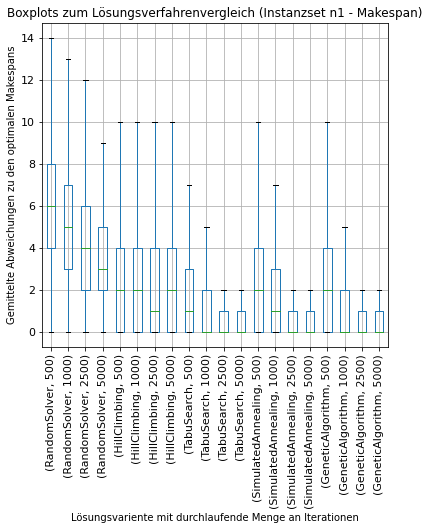

In [21]:
boxplot = df_frame.boxplot(column="makespan_derivation", by=['solver', 'iterations'], showfliers=False, rot=90, fontsize=11, figsize=(6, 6))
plt.title("Boxplots zum Lösungsverfahrenvergleich (Instanzset n1 - Makespan)")
plt.suptitle("")
plt.xlabel("Lösungsvariente mit durchlaufende Menge an Iterationen")
plt.ylabel("Gemittelte Abweichungen zu den optimalen Makespans")
plt.show()

C:\Users\ReneKB\AppData\Local\Programs\Python\Python37\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


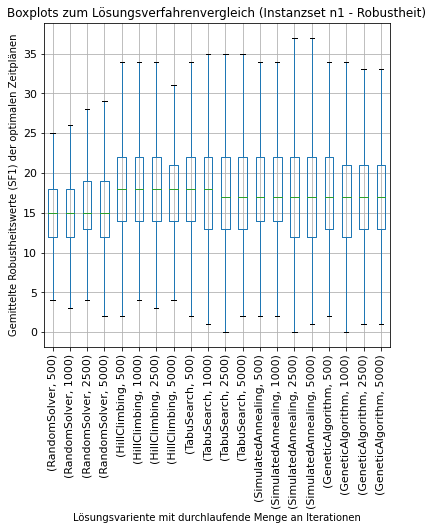

In [22]:
boxplot = df_frame[df_frame.robustness != -1].boxplot(column="robustness", by=['solver', 'iterations'], showfliers=False, rot=90, fontsize=11, figsize=(6, 6))
plt.title("Boxplots zum Lösungsverfahrenvergleich (Instanzset n1 - Robustheit)")
plt.suptitle("")
plt.xlabel("Lösungsvariente mit durchlaufende Menge an Iterationen")
plt.ylabel("Gemittelte Robustheitswerte (SF1) der optimalen Zeitplänen")
plt.show()